In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('/content/drive/My Drive/License Plate Data/Train')

In [12]:
path.ls()

[PosixPath('/content/drive/My Drive/License Plate Data/Train/License Plate'),
 PosixPath('/content/drive/My Drive/License Plate Data/Train/Non Plate')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [14]:
data.c

2

In [15]:
data.classes

['License Plate', 'Non Plate']

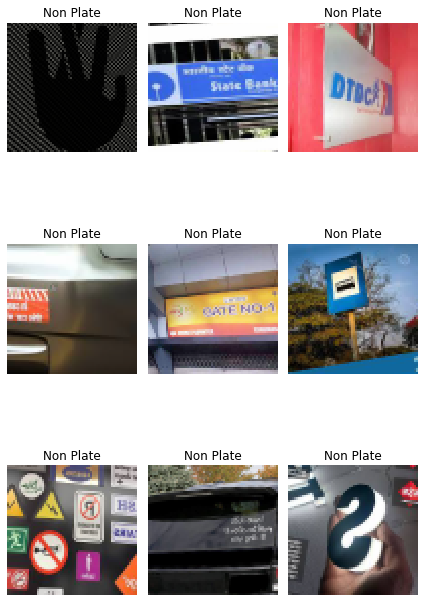

In [16]:
data.show_batch(rows=3, figsize=(6,10))

In [17]:
learn = cnn_learner(data, models.resnet34, metrics = [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 178MB/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.833144,0.277406,0.082707,0.917293,10:55
1,0.457803,0.168728,0.045113,0.954887,00:36
2,0.337338,0.103067,0.033835,0.966165,00:20
3,0.259255,0.101150,0.030075,0.969925,00:19


In [0]:
learn.save('stage-1')

In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1064 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
License Plate,License Plate,License Plate,License Plate,License Plate
Path: /content/drive/My Drive/License Plate Data/Train;

Valid: LabelList (266 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Non Plate,License Plate,Non Plate,License Plate,License Plate
Path: /content/drive/My Drive/License Plate Data/Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3,

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

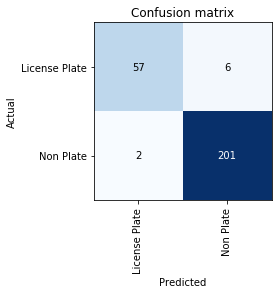

In [22]:
interp.plot_confusion_matrix()

In [0]:
losses,idxs = interp.top_losses()

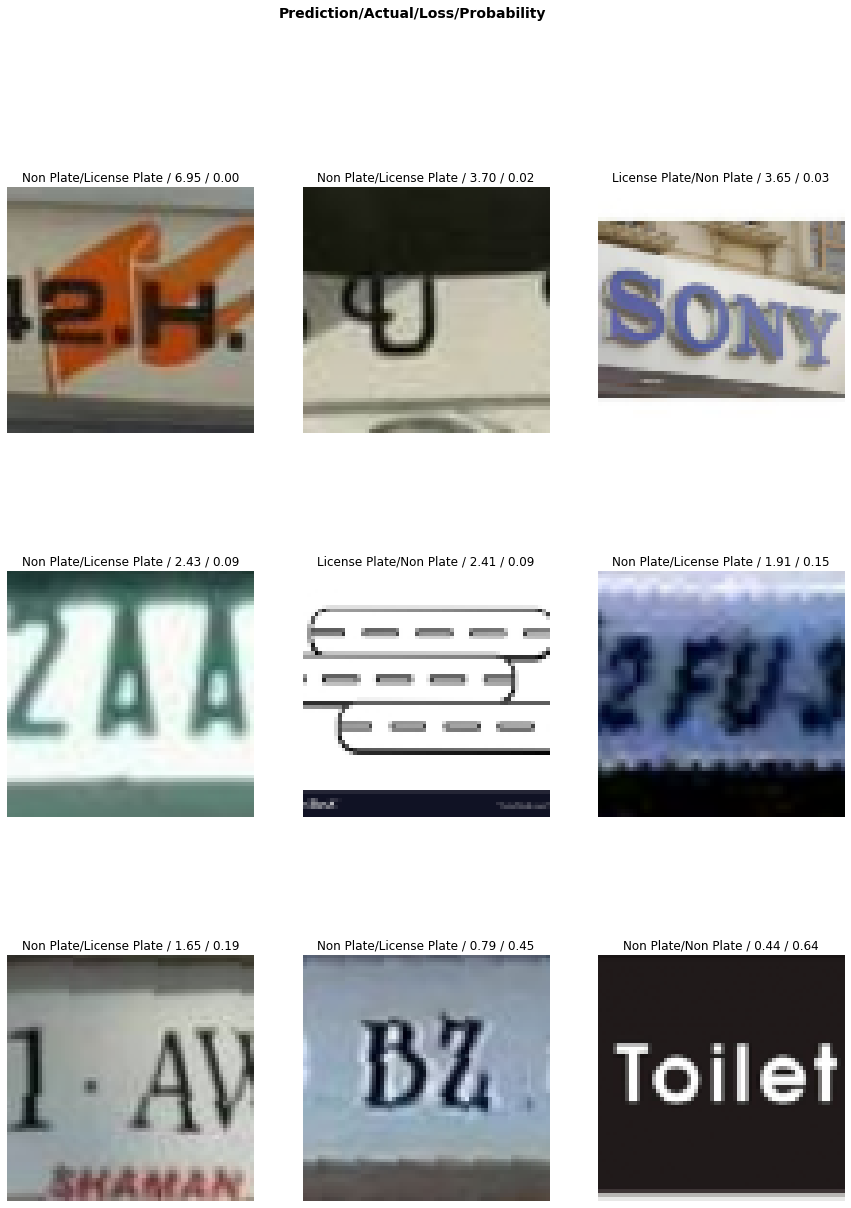

In [57]:
interp.plot_top_losses(9, figsize=(15,20))

In [58]:
interp.most_confused(min_val=2)

[('License Plate', 'Non Plate', 6), ('Non Plate', 'License Plate', 2)]

In [0]:
learn.export()

In [24]:
path.ls()

[PosixPath('/content/drive/My Drive/License Plate Data/Train/License Plate'),
 PosixPath('/content/drive/My Drive/License Plate Data/Train/Non Plate'),
 PosixPath('/content/drive/My Drive/License Plate Data/Train/models'),
 PosixPath('/content/drive/My Drive/License Plate Data/Train/export.pkl')]

In [0]:
test = ImageList.from_folder('/content/drive/My Drive/License Plate Data/Test/License Plate')

In [26]:
len(test)

248

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [29]:
labelled_preds[:12]


['Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate',
 'Non Plate']

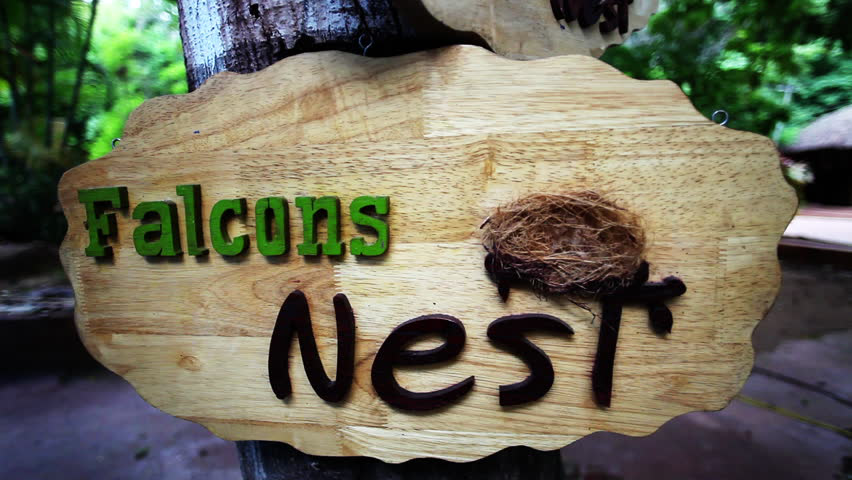

In [30]:
img = open_image('/content/drive/My Drive/License Plate Data/Test/License Plate/1.jpg')
img

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Non Plate

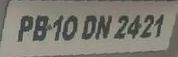

In [32]:
img = open_image('/content/drive/My Drive/License Plate Data/Test/License Plate/Chevrolet-Cruze-524697c.jpg_0005_0403_0296_0178_0057.png')
img

In [33]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category License Plate

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [35]:
fnames[:]

['41D0CCaFICL._SX425_',
 '81PlNCBl6AL._SX466_',
 '30-1459329519-epicsignboardfailsyoucanonlyfindinindia17-1395670943',
 '31pL4ysXD5L',
 '33-7',
 '8',
 '46e5cce6bf8ab87cc87d940e1345d18d--wall-vinyl-sticker-vinyl',
 '57fcbac42fec43212d552a81-large',
 '51SYOjeHdJL._SX425_',
 '81UT4mcJosL._SR500500_',
 '77-2',
 '13_b',
 '61QlbbbGeIL._SL1000_',
 '41oiChwE8hL._SX466_',
 '15-19cm-Go-sit-on-a-cactus-car-decal-Quotes-Art-Car-Stickers-Vinyl-Decor-Car.jpg_q50',
 '71YLyjMZSUL._SY500_',
 '73-512',
 '61xRusU4b4L._SL1206_',
 '40-60cm-Customized-Acrylic-signboard-Acrylic-business-sign-for-company',
 '3d-custom-mobile-shop-sign-board-design.jpg_350x350',
 '44-8',
 '41B5CxjeF4L._SS700_',
 '10',
 '61O3fWdjHbL._SR500500_',
 '51fcINkftYL',
 '3d-vinyl-glow-sign-board-500x500',
 '4-Emergency-Signages',
 '71l4QgJzrML._SY355_',
 '3-84f6ff5ca925969f5ec3831c897aa6f3',
 '1_b',
 '61CpEev8VYL._AC_UL320_',
 '55-8',
 '61H5TD-GFtL._SX425_',
 '81Bgcm9Uh5L._SX425_',
 '51OnMhmXiFL._SR500500_',
 '3x10-black-offensive-libe

In [36]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df

,image_name,tags
0,41D0CCaFICL._SX425_,Non Plate
1,81PlNCBl6AL._SX466_,Non Plate
2,30-1459329519-epicsignboardfailsyoucanonlyfind...,Non Plate
3,31pL4ysXD5L,Non Plate
4,33-7,Non Plate
...,...,...
243,Volkswagen-Vento-525178b.jpg_0334_0011_0378_01...,License Plate
244,Volvo-XC90-524182b.jpg_0002_0391_0414_0199_0045,License Plate
245,Volkswagen-Vento-524640c.jpg_0000_0273_0307_02...,License Plate Non Plate
246,Volkswagen-Vento-528042c.jpg_0000_0285_0321_02...,License Plate


In [37]:
df.head()

,image_name,tags
0,41D0CCaFICL._SX425_,Non Plate
1,81PlNCBl6AL._SX466_,Non Plate
2,30-1459329519-epicsignboardfailsyoucanonlyfind...,Non Plate
3,31pL4ysXD5L,Non Plate
4,33-7,Non Plate


In [39]:
image = cv2.imread("/content/drive/My Drive/Check/images.jpeg")
image.shape

(350, 590, 3)

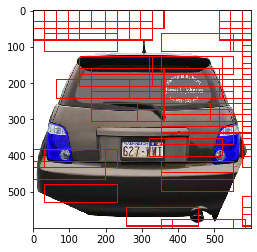

In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = cv2.imread("/content/drive/My Drive/Check/car1.jpg")
tmp = image
stepSize = 32
(w_width, w_height) = (200, 50)
for y in range(0, image.shape[0], stepSize):
   for x in range(0, image.shape[1], stepSize):
      window = image[x:x + w_width, y:y + w_height, :]
      img1 = Image.fromarray(window, 'RGB')
      img1.save('my.png')
      img1.show()
      img = open_image('my.png')
      pred_class,pred_idx,outputs = learn.predict(img)
      p = str(pred_class)
      if p == "License Plate":
        cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 2)
        plt.imshow(np.array(tmp).astype('uint8'))
plt.show()
